Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data Set

In [5]:
file_path = "C:/Users/Lenovo/Desktop/Internship/amazon/Amazon Sales data.csv"
data = pd.read_csv(file_path)


Data Cleaning And Preprocessing

In [6]:
# Inspect the data
data.head()  
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [7]:
# Checking number of rows and colums
data.shape

(100, 14)

In [8]:
# Handling missing values
data.isnull().sum()  

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
# Drop or fill missing values
data.dropna(inplace=True)

In [10]:
# Checking Data Types
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [11]:
# Change Data Types
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Total Revenue'] =pd.to_numeric(data['Total Revenue'])

In [12]:
# Ensure Region and Country columns are strings
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)


In [13]:
# Calculating Average Profit Generated
np.average(data['Total Profit'])

441681.98399999994

In [14]:
# Calculating Maximum Profit Earned
np.max(data['Total Profit'])

1719922.04

In [15]:
# Calculating Minimum Profit Earned
np.min(data['Total Profit'])

1258.02

In [16]:
# Calculating Maximum Revenue Generated
np.max(data['Total Revenue'])

5997054.98

In [17]:
# Calculating Minimum Revenue Generated
np.min(data['Total Revenue'])

4870.26

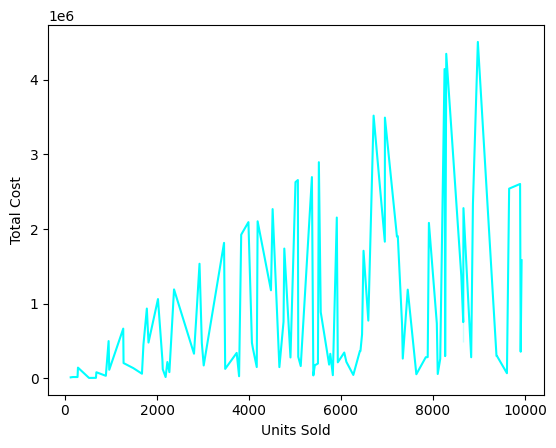

In [18]:
sns.lineplot(data=data, x='Units Sold', y='Total Cost', color='Aqua', legend= None)
plt.ylabel('Total Cost')
plt.show()

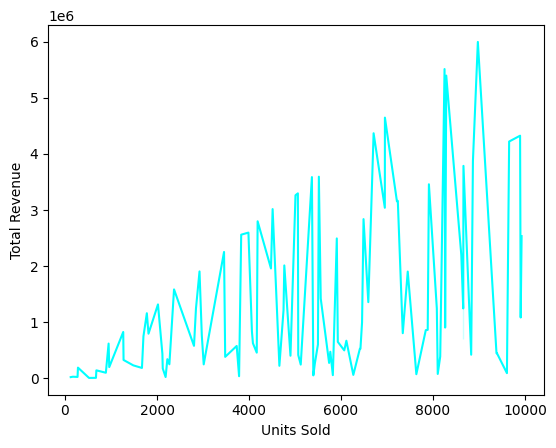

In [19]:
sns.lineplot(data=data, x='Units Sold', y='Total Revenue', color='Aqua', legend= None)
plt.ylabel('Total Revenue')
plt.show()

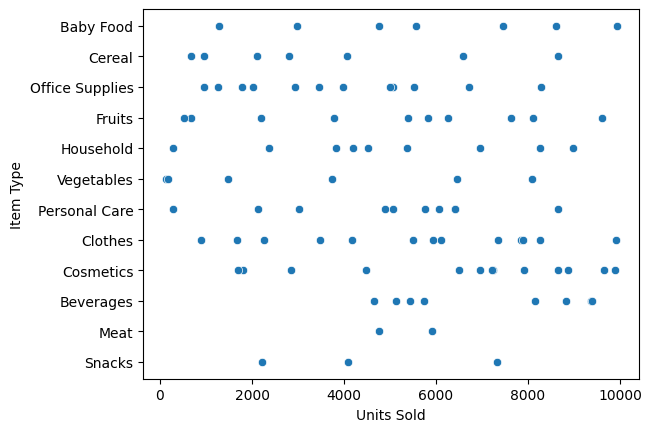

In [20]:
# Scatter plot between Unit Sold and item
sns.scatterplot(data=data, x='Units Sold', y='Item Type')
plt.show()

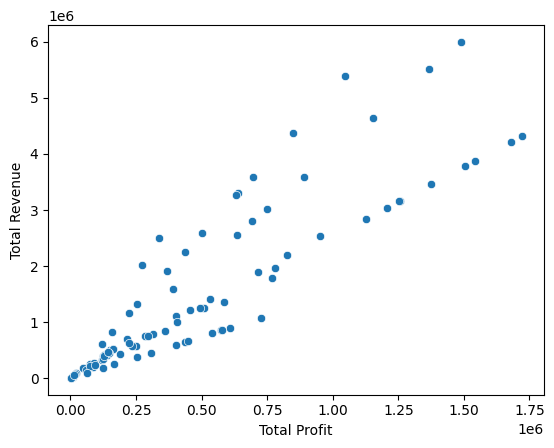

In [21]:
# Scatter plot between Total Revenue and Total Profit
sns.scatterplot(data=data, x='Total Profit', y='Total Revenue')
plt.show()

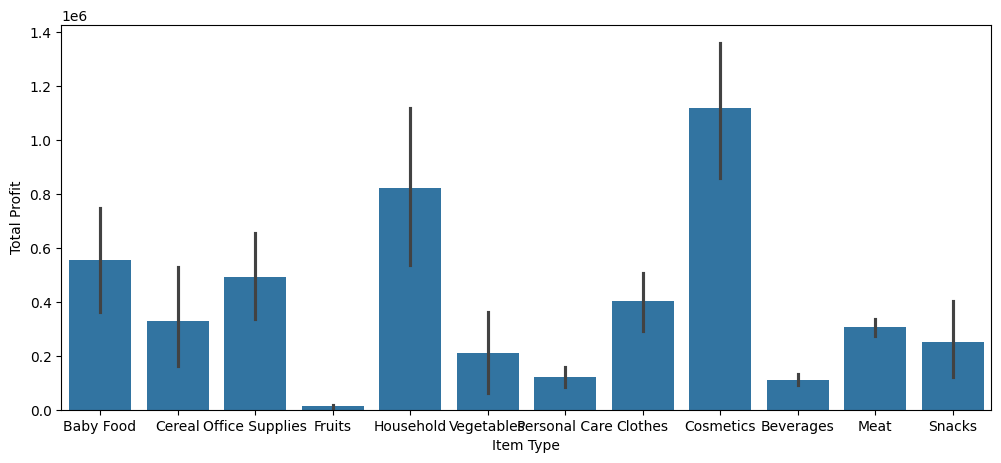

In [22]:
# Bar plot between items type and the total profit
plt.figure(figsize=(12,5))
sns.barplot(data=data, x='Item Type', y='Total Profit')
plt.show()



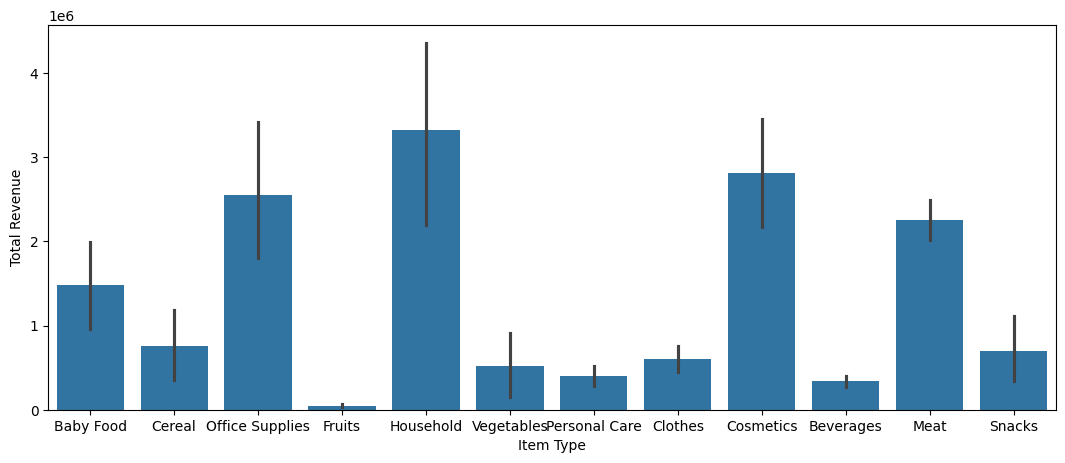

In [23]:
# Bar plot between items type and the total revenue
plt.figure(figsize=(13,5))
sns.barplot(data=data, x='Item Type', y='Total Revenue')
plt.show()


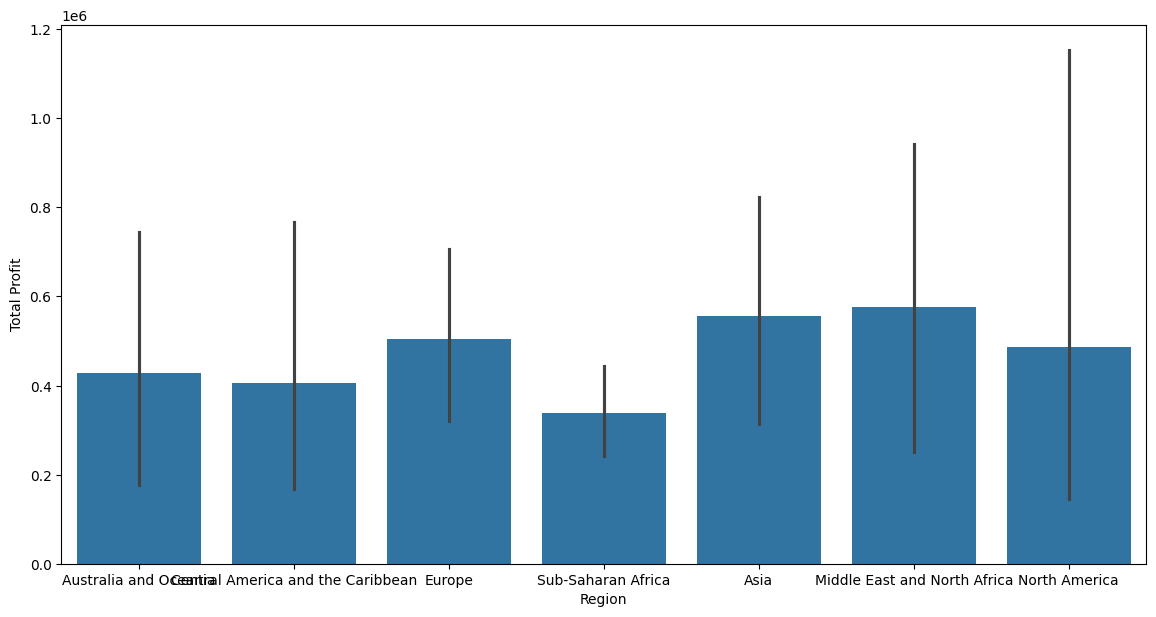

In [24]:
# Bar plot between Region and the total Profit
plt.figure(figsize=(14,7))
sns.barplot(data=data, x='Region', y='Total Profit')
plt.show()

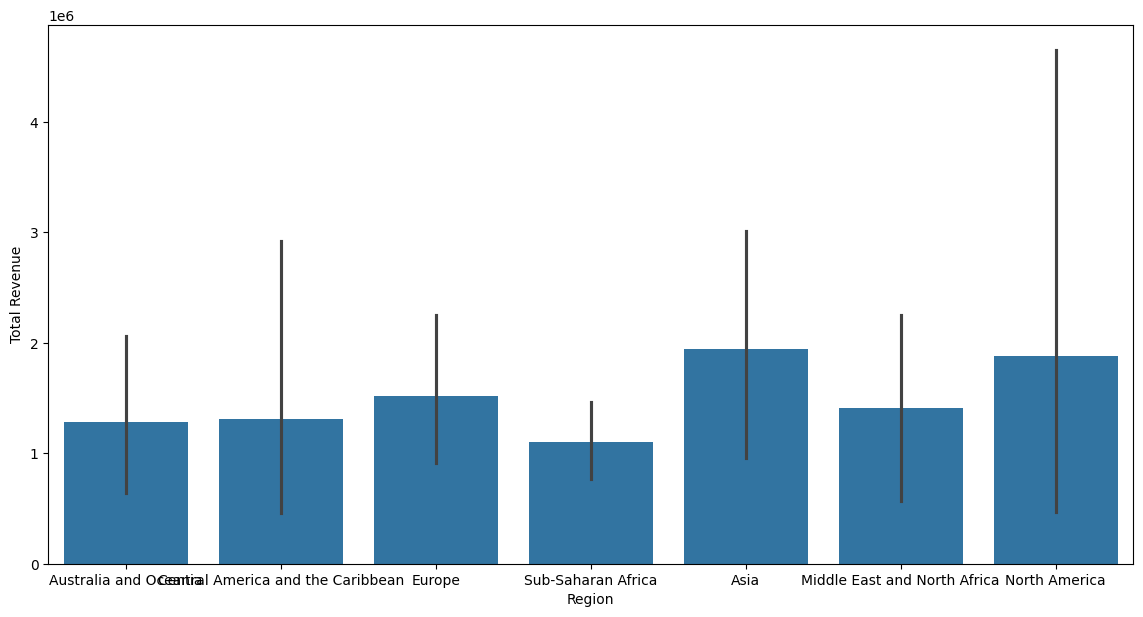

In [25]:
# Bar plot between Region and the total Revenue
plt.figure(figsize=(14,7))
sns.barplot(data=data, x='Region', y='Total Revenue')
plt.show()

In [26]:
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [27]:
# Extract month and year from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [28]:
# Monthly  Sales Trend
# Group data by year and month and aggregate the required columns
monthly_sales = data.groupby(['Year', 'Month']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()


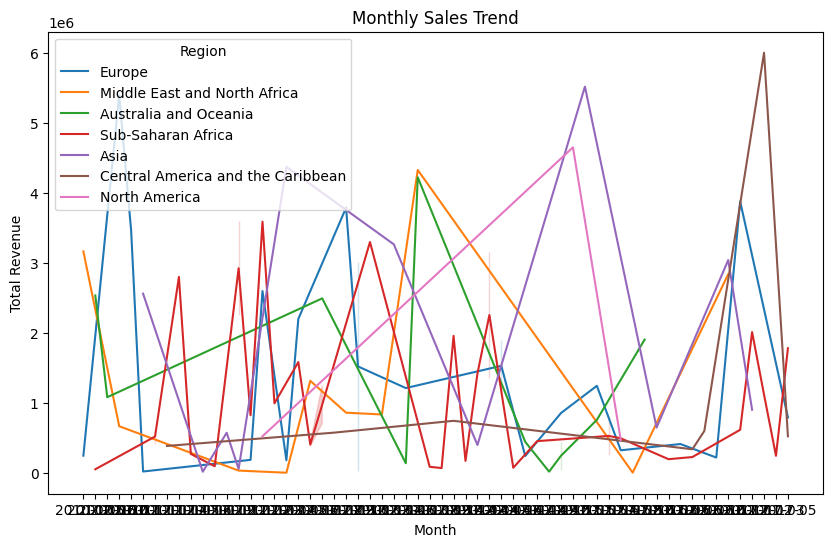

In [29]:
# Monthly  Sales Trend
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby(['Month', 'Region', 'Country']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total Revenue',hue='Region', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Region')
plt.show()

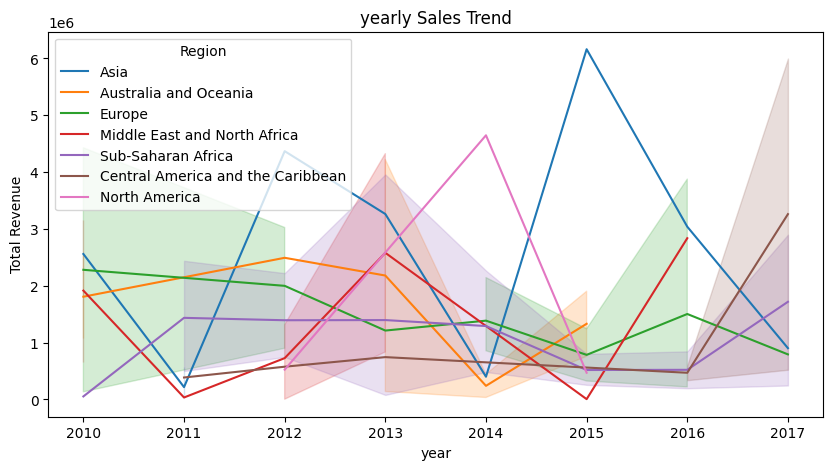

In [30]:
#Yearly Sales Trend
data['year'] = data['Order Date'].dt.year
yearly_sales = data.groupby(['year','Region','Country']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()


yearly_sales['year'] = yearly_sales['year'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='Total Revenue', hue='Region', data=yearly_sales)
plt.title('yearly Sales Trend')
plt.xlabel('year')
plt.ylabel('Total Revenue')
plt.legend(title='Region')
plt.show()


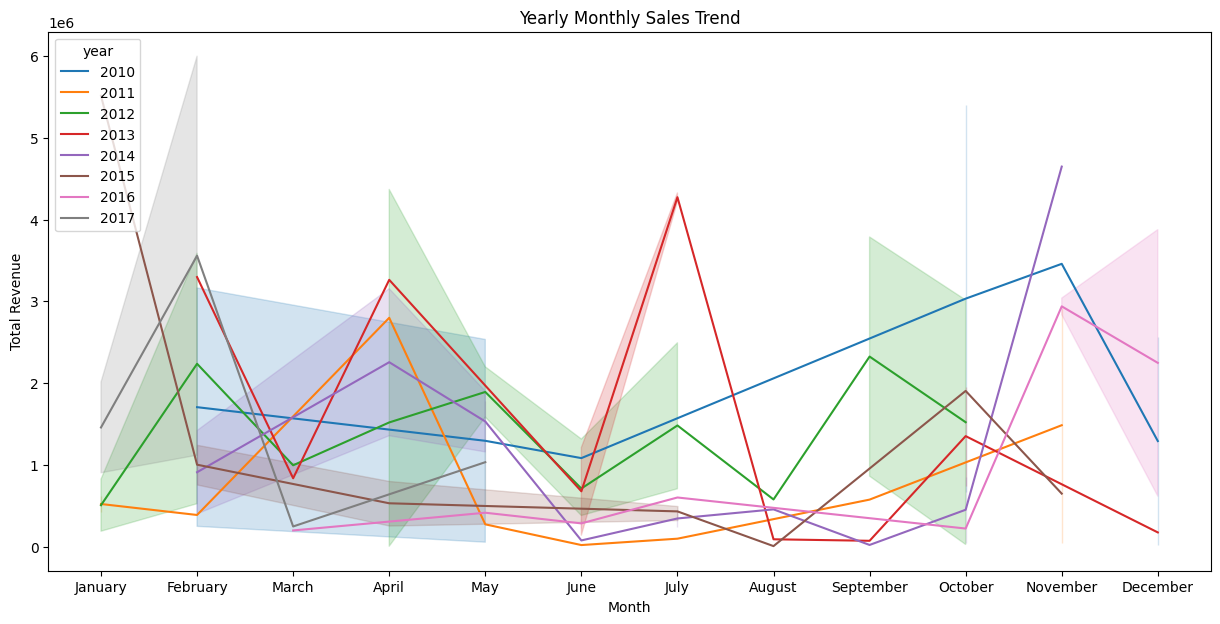

In [31]:
#Yearly Monthly Sales Trend

# Convert Date into Months Names
data['Month'] = data['Order Date'].dt.strftime('%B') 

yearly_monthly_sales = data.groupby(['year', 'Month','Region', 'Country']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()


#convert Year And Month into string plotting
yearly_monthly_sales['year'] = yearly_monthly_sales['year'].astype(str)
yearly_monthly_sales['Month'] = pd.Categorical(yearly_monthly_sales['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

plt.figure(figsize=(15, 7))
sns.lineplot(x='Month', y='Total Revenue', hue='year', data=yearly_monthly_sales)
plt.title('Yearly Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='year')
plt.show()





